Primeiras linhas do dataset:
   ID_PRODUTO         DIA  FLAG_PROMOCAO  QUANTIDADE_ESTOQUE
0           1  2023-12-31              0                  91
1           2  2023-12-31              0                  64
2           3  2023-12-31              0                  66
3           4  2023-12-31              0                  72
4           5  2023-12-31              0                  95
RMSE: 29.93
R²: -0.09


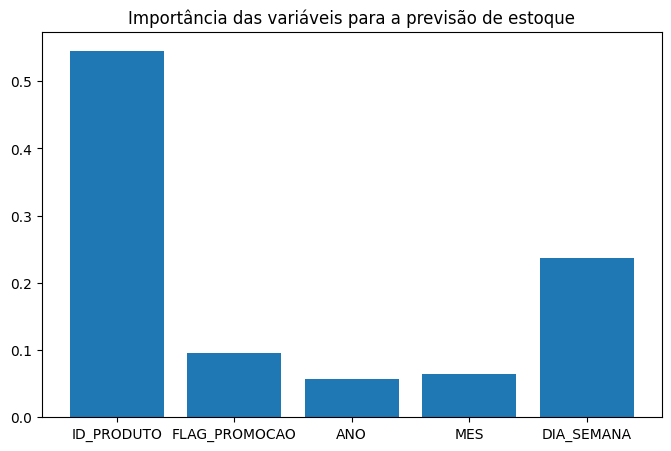

Exemplo de previsões:
     ID_PRODUTO  FLAG_PROMOCAO   ANO  MES  DIA_SEMANA  ESTOQUE_REAL  \
361          12              0  2024    1           6             7   
73           24              0  2024    1           1            44   
374          25              0  2024    1           6             0   
155           6              1  2024    1           5            28   
104           5              0  2024    1           3            88   
394          20              0  2024    1           0             2   
377           3              0  2024    1           0             0   
124          25              1  2024    1           3            35   
68           19              0  2024    1           1            56   
450           1              1  2024    1           3            22   

     ESTOQUE_PREVISTO  
361         39.503667  
73          16.586500  
374         24.201667  
155          9.952500  
104         39.633333  
394         36.868500  
377         50.269167  
124 

In [2]:
# ==============================
# 1. Importar bibliotecas
# ==============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ==============================
# 2. Carregar dataset
# ==============================
df = pd.read_csv("dataset-500-curso-sagemaker-canvas-dio.csv")

print("Primeiras linhas do dataset:")
print(df.head())

# ==============================
# 3. Preparar os dados
# ==============================
# Converter coluna de data
df["DIA"] = pd.to_datetime(df["DIA"])

# Criar novas features a partir da data
df["ANO"] = df["DIA"].dt.year
df["MES"] = df["DIA"].dt.month
df["DIA_SEMANA"] = df["DIA"].dt.weekday

# Definir variáveis de entrada (X) e saída (y)
X = df[["ID_PRODUTO", "FLAG_PROMOCAO", "ANO", "MES", "DIA_SEMANA"]]
y = df["QUANTIDADE_ESTOQUE"]

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================
# 4. Treinar modelo
# ==============================
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# ==============================
# 5. Avaliar desempenho
# ==============================
y_pred = modelo.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# ==============================
# 6. Importância das variáveis
# ==============================
importancias = modelo.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.bar(features, importancias)
plt.title("Importância das variáveis para a previsão de estoque")
plt.show()

# ==============================
# 7. Fazer previsões
# ==============================
novos_dados = X_test.head(10)  # exemplo com 10 registros
previsoes = modelo.predict(novos_dados)

resultados = pd.DataFrame({
    "ID_PRODUTO": novos_dados["ID_PRODUTO"],
    "FLAG_PROMOCAO": novos_dados["FLAG_PROMOCAO"],
    "ANO": novos_dados["ANO"],
    "MES": novos_dados["MES"],
    "DIA_SEMANA": novos_dados["DIA_SEMANA"],
    "ESTOQUE_REAL": y_test.head(10).values,
    "ESTOQUE_PREVISTO": previsoes
})

print("Exemplo de previsões:")
print(resultados)

# ==============================
# 8. Exportar previsões
# ==============================
resultados.to_csv("previsoes_estoque.csv", index=False)
print("Arquivo previsoes_estoque.csv salvo com sucesso!")
